In [7]:
%load_ext autoreload
%autoreload 2

from iqm.benchmarks.optimization.qscore_rebased import *
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Choose (or define) a backend

In [8]:
backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

#### Set IQM Token if using Resonance.

In [ ]:
# import os
# os.environ["IQM_TOKEN"] = "XXXXXXXXXXXXXX"

# Qscore Configuration

In [10]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 20_000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes = 5,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4]],
    seed = random.randint(1, 999999),
    )

# Run the experiment

In [11]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run0_qscore = benchmark_qscore.run()

2024-12-20 14:44:24,562 - iqm.benchmarks.logging_config - INFO - Executing on 100 random graphs with 2 nodes.
2024-12-20 14:44:24,562 - iqm.benchmarks.logging_config - INFO - Executing graph 0 with 2 nodes.
2024-12-20 14:44:24,562 - iqm.benchmarks.logging_config - INFO - This graph instance has no edges.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - Solved the MaxCut on graph 1/100.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - Executing graph 1 with 2 nodes.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - Graph 2/100 had no edges: cut size = 0.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - This graph instance has no edges.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - Solved the MaxCut on graph 2/100.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - Executing graph 2 with 2 nodes.
2024-12-20 14:44:24,563 - iqm.benchmarks.logging_config - INFO - Graph 3/100 had no edges: cut siz

# Perform Analysis

2024-12-20 14:44:35,984 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with:
Approximation ratio (Beta): 0.6157; Avg MaxCut size: 0.5600
2024-12-20 14:44:36,614 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with:
Approximation ratio (Beta): 0.6542; Avg MaxCut size: 1.3551
2024-12-20 14:44:37,481 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with:
Approximation ratio (Beta): 0.3947; Avg MaxCut size: 2.0621
2024-12-20 14:44:38,775 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with:
Approximation ratio (Beta): 0.2102; Avg MaxCut size: 2.9183


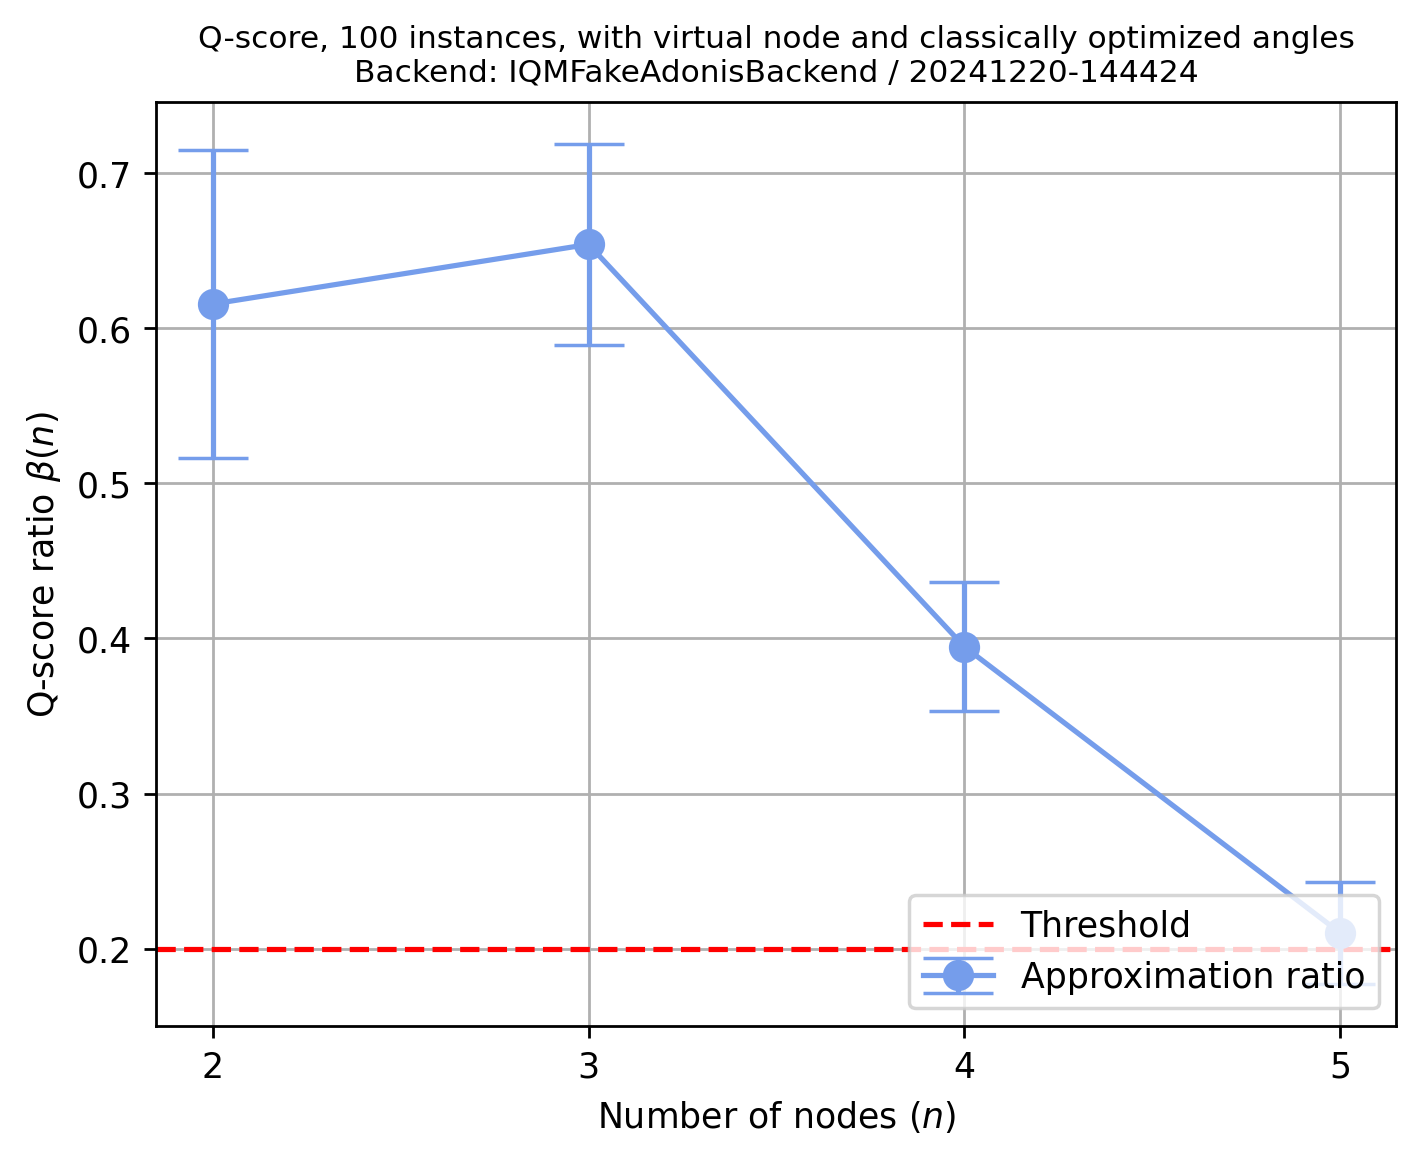

In [13]:
result0_qscore = benchmark_qscore.analyze()